Mutual Information

Estimate mutual information for a continuous target variable.

Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

The function relies on nonparametric methods based on entropy estimation from k-nearest neighbors distances

Mutual information is calculated between two variables and measures the reduction in uncertainty for one variable given a known value of the other variable.

A quantity called mutual information measures the amount of information one can obtain from one random variable given another.

The mutual information between two random variables X and Y can be stated formally as follows:

<b>I(X ; Y) = H(X) – H(X | Y) Where I(X ; Y) is the mutual information for X and Y, H(X) is the entropy for X and H(X | Y) is the conditional entropy for X given Y. The result has the units of bits.
Youtube Videos<b>

Entropy: https://www.youtube.com/watch?v=1IQOtJ4NI_0

Information Gain: https://www.youtube.com/watch?v=FuTRucXB9rA

Gini Impurity: https://www.youtube.com/watch?v=5aIFgrrTqOw

Statistical test: https://www.youtube.com/watch?v=4-rxTA_5_xA

https://www.youtube.com/watch?v=YrhlQB3mQFI


In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv('https://raw.githubusercontent.com/chandanverma07/DataSets/master/Housing_Data.csv')
df.head()

,Unnamed: 0,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,1,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,2,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
2,3,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
3,4,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
4,5,61000.0,6360,2,1,1,yes,no,no,no,no,0,no


In [2]:
for feature in df[['driveway','recroom','fullbase','gashw','airco','prefarea']]:
    df[feature]=np.where(df[feature]=='no',0,1)
df.head()

,Unnamed: 0,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,1,42000.0,5850,3,1,2,1,0,1,0,0,1,0
1,2,38500.0,4000,2,1,1,1,0,0,0,0,0,0
2,3,49500.0,3060,3,1,1,1,0,0,0,0,0,0
3,4,60500.0,6650,3,1,2,1,1,0,0,0,0,0
4,5,61000.0,6360,2,1,1,1,0,0,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  546 non-null    int64  
 1   price       546 non-null    float64
 2   lotsize     546 non-null    int64  
 3   bedrooms    546 non-null    int64  
 4   bathrms     546 non-null    int64  
 5   stories     546 non-null    int64  
 6   driveway    546 non-null    int64  
 7   recroom     546 non-null    int64  
 8   fullbase    546 non-null    int64  
 9   gashw       546 non-null    int64  
 10  airco       546 non-null    int64  
 11  garagepl    546 non-null    int64  
 12  prefarea    546 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 55.6 KB


In [4]:
X=df.drop(['price','Unnamed: 0'],axis=1)
y=df['price']
from sklearn.feature_selection import mutual_info_regression
# determine the mutual information
mutual_info = mutual_info_regression(X, y)
mutual_info

array([0.1602498 , 0.0987355 , 0.1479902 , 0.12741919, 0.05950295,
       0.07292259, 0.04863486, 0.02672083, 0.10563526, 0.14950087,
       0.05004562])

In [5]:
mutual_info = pd.Series(mutual_info,index = X.columns)
mutual_info.sort_values(ascending=False)

lotsize     0.160250
garagepl    0.149501
bathrms     0.147990
stories     0.127419
airco       0.105635
bedrooms    0.098736
recroom     0.072923
driveway    0.059503
prefarea    0.050046
fullbase    0.048635
gashw       0.026721
dtype: float64

<AxesSubplot:>

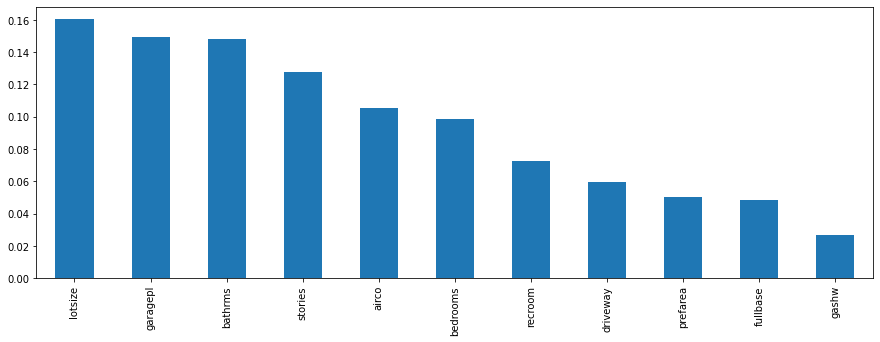

In [6]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

In [7]:
from sklearn.feature_selection import SelectPercentile # alternative is select k best

## Selecting the top 20 percentile
selected_top_columns = SelectPercentile(mutual_info_regression, percentile=20)
selected_top_columns.fit(X, y)

selected_top_columns.get_support()

X.columns[selected_top_columns.get_support()]



Index(['lotsize', 'bathrms'], dtype='object')


Difference Between Information Gain And Mutual Information

I(X ; Y) = H(X) – H(X | Y) and IG(S, a) = H(S) – H(S | a)

As such, mutual information is sometimes used as a synonym for information gain. Technically, they calculate the same quantity if applied to the same data.
